In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("./speech_data.csv")
df.head(3)

,Name,Unifying Words Count,Polarizing Words Count,Total Words Count,Political Party,Overall Language,Unifying Words Ratio,Polarizing Words Ratio
0,Donald J. Trump (2nd Term),20,23,2905,Republican,polarizing,0.00688,0.00792
1,"Joseph R. Biden, Jr.",31,6,2532,Democrat,unifying,0.01224,0.00237
2,Donald J. Trump (1st Term),12,4,1455,Republican,unifying,0.00825,0.00275


# Continued Data Cleaning

In [4]:
# View unqiue political parties 
print(df["Political Party"].unique())

['Republican' 'Democrat' 'Democrat (Union)' 'Whig'
 'Whig (later Unaffiliated)' 'Democratic-Republican' 'Federalist'
 'No formal party']


In [5]:
# Replace 'Democrat (Union)' with 'Democrat'
df["Political Party"] = df["Political Party"].replace("Democrat (Union)", "Democrat")

In [6]:
# Check
print(df["Political Party"].unique())

['Republican' 'Democrat' 'Whig' 'Whig (later Unaffiliated)'
 'Democratic-Republican' 'Federalist' 'No formal party']


In [7]:
# View counts of Political Party 
# Need to check how many 'Republican' and 'Democrat' observations 
df["Political Party"].value_counts()

Political Party
Republican                   26
Democrat                     24
Democratic-Republican         7
Whig                          2
No formal party               2
Whig (later Unaffiliated)     1
Federalist                    1
Name: count, dtype: int64

In [18]:
# Subset data with Republican or Democratic Presidents 
df2 = df[(df["Political Party"] == "Republican")|(df["Political Party"] == "Democrat")].copy()

df2.head()
df2["Political Party"].unique()


array(['Republican', 'Democrat'], dtype=object)

# Exploratory Plots

### Distributions of Polarizing and Unifying Word Counts 

<Axes: xlabel='Unifying Words Ratio', ylabel='Density'>

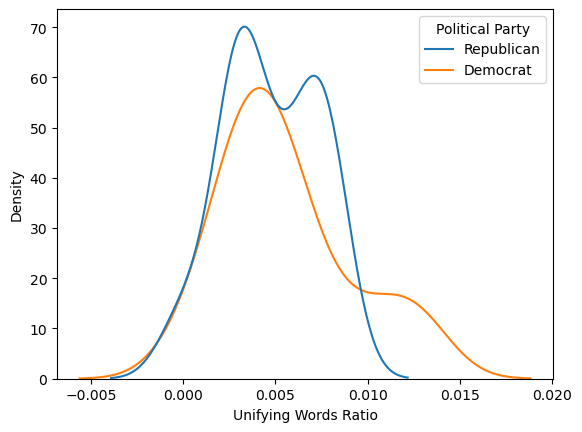

In [19]:
sns.kdeplot(data=df2, x="Unifying Words Ratio", hue="Political Party")

<Axes: xlabel='Polarizing Words Ratio', ylabel='Density'>

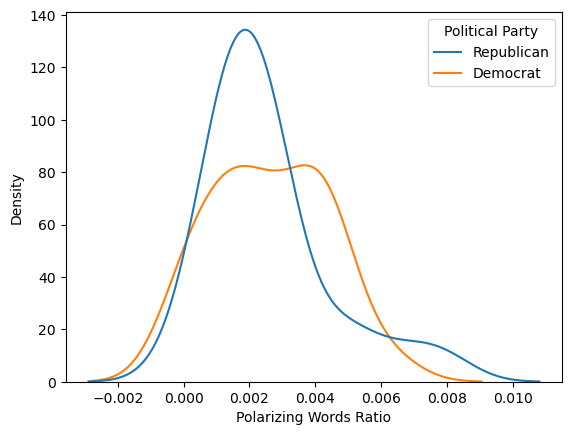

In [20]:
sns.kdeplot(data=df2, x="Polarizing Words Ratio", hue="Political Party")

In [21]:
df2.head()

,Name,Unifying Words Count,Polarizing Words Count,Total Words Count,Political Party,Overall Language,Unifying Words Ratio,Polarizing Words Ratio
0,Donald J. Trump (2nd Term),20,23,2905,Republican,polarizing,0.00688,0.00792
1,"Joseph R. Biden, Jr.",31,6,2532,Democrat,unifying,0.01224,0.00237
2,Donald J. Trump (1st Term),12,4,1455,Republican,unifying,0.00825,0.00275
3,Barack Obama,15,5,2090,Democrat,unifying,0.00718,0.00239
4,Barack Obama,13,15,2391,Democrat,polarizing,0.00544,0.00627


In [26]:
df2["Overall Ratio"] = df2["Unifying Words Ratio"] / df2["Polarizing Words Ratio"]
df2.head()


,Name,Unifying Words Count,Polarizing Words Count,Total Words Count,Political Party,Overall Language,Unifying Words Ratio,Polarizing Words Ratio,Overall Ratio,Overall Ratio (simplified)
0,Donald J. Trump (2nd Term),20,23,2905,Republican,polarizing,0.00688,0.00792,0.868687,0.869565
1,"Joseph R. Biden, Jr.",31,6,2532,Democrat,unifying,0.01224,0.00237,5.164557,5.166667
2,Donald J. Trump (1st Term),12,4,1455,Republican,unifying,0.00825,0.00275,3.000000,3.000000
3,Barack Obama,15,5,2090,Democrat,unifying,0.00718,0.00239,3.004184,3.000000
4,Barack Obama,13,15,2391,Democrat,polarizing,0.00544,0.00627,0.867624,0.866667


<Axes: xlabel='Unifying Words Ratio', ylabel='Political Party'>

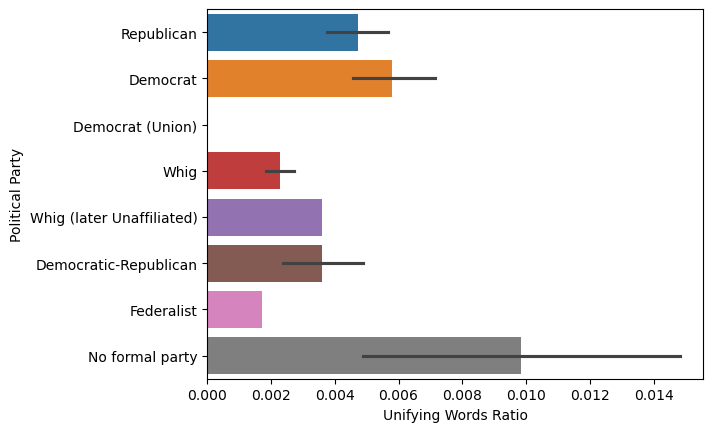

In [9]:
sns.barplot(data=df, x="Unifying Words Ratio", y="Political Party", hue="Political Party")